<a href="https://colab.research.google.com/github/benjamin-dinh/IMDb_webscraper/blob/main/HW1_BenjaminDinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Scraping**

In [ ]:
import requests
from IPython.core.display import HTML

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
url1 = "https://www.imdb.com/list/ls068082370/"
url2 = "https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=2"
url3 = "https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=3"

In [ ]:
headers = {'Accept-Language':'en-US,en'}
page1 = requests.get(url1, headers=headers)
page2 = requests.get(url2, headers=headers)
page3 = requests.get(url3, headers=headers)

In [ ]:
soup1 = BeautifulSoup(page1.content, 'html.parser')
soup2 = BeautifulSoup(page2.content, 'html.parser')
soup3 = BeautifulSoup(page3.content, 'html.parser')
movies1 = soup1.select('div.lister-item.mode-detail')
movies2 = soup2.select('div.lister-item.mode-detail')
movies3 = soup3.select('div.lister-item.mode-detail')

In [ ]:
def get_movie_title(movie_node):
    movie_node = movie_node.select_one('h3 a')
    if not movie_node:
        return None
    return movie_node.text[:]

In [ ]:
def get_movie_year(movie_node):
    movie_node = movie_node.select_one('span.lister-item-year')
    if not movie_node:
        return None
    return movie_node.text[1:-1]

In [ ]:
def get_movie_rating(movie_node):
    movie_node = movie_node.select_one('span.ipl-rating-star__rating')
    if not movie_node:
        return None
    return movie_node.text[:]

In [ ]:
def get_movie_genre(movie_node):
    movie_node = movie_node.select_one('span.genre')
    if not movie_node:
        return None
    movie_node = movie_node.text.strip()
    return movie_node.split(',')[0]

In [ ]:
def get_movie_director(movie_node):
    movie_node = movie_node.select_one('p.text-muted.text-small a')
    if not movie_node:
        return None
    return movie_node.text[:]

In [ ]:
def get_movie_votes(movie_node):
    movie_node = movie_node.find('span', {'name':'nv'})
    if not movie_node:
        return None
    return int(movie_node.text[:].replace(',',''))

In [ ]:
def append_movie_info(movies):
  for movie_node in movies:
      movie_info.append(dict(
          title=get_movie_title(movie_node),
          year=get_movie_year(movie_node),
          rating=get_movie_rating(movie_node),
          genre=get_movie_genre(movie_node),
          director=get_movie_director(movie_node),
          numberOfVotes=get_movie_votes(movie_node)
      ))

In [ ]:
movie_info=[]
append_movie_info(movies1)
append_movie_info(movies2)
append_movie_info(movies3)
# movie_info
df_movies = pd.DataFrame(movie_info)
# df_movies.info()

### *Analysis*

**Question 1**

In [ ]:
maxVote = df_movies.numberOfVotes.max()
minVote = df_movies.numberOfVotes.min()
print("The movie with the most votes is " + df_movies['title'][df_movies['numberOfVotes'] == maxVote].values[0])
print("The movie with the least votes is " + df_movies['title'][df_movies['numberOfVotes'] == minVote].values[0])

The movie with the most votes is The Shawshank Redemption
The movie with the least votes is Zulu


**Question 2**

The genre with the most movies is Drama


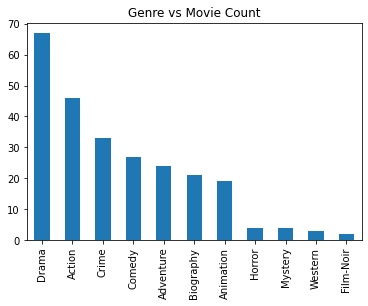

In [ ]:
genre_counts = df_movies.genre.value_counts()
genre_counts.plot(kind='bar', title ='Genre vs Movie Count')
print('The genre with the most movies is '+ genre_counts.keys()[0])

**Question 3**

In [ ]:
director_counts = df_movies.director.value_counts()
print('The top five directors with the most number of movies are: ')
for x in range(5):
  print(director_counts.keys()[x])

The top five directors with the most number of movies are: 
Christopher Nolan
Stanley Kubrick
Steven Spielberg
Martin Scorsese
Alfred Hitchcock


# **2. Database Access**

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# For example mine is test-project-ecs189l, so I will run project_id = 'test-project-ecs189l'
# project_id = 'Paste Your Project ID here to Replace This String'
project_id = "benjamin-ecs189l"

In [ ]:
df_storms = pd.io.gbq.read_gbq('''SELECT
  LOWER(event_type) as event_type,
  COUNT(event_id) as count_storms,
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  event_begin_time BETWEEN "1950-01-01" AND "2000-12-31"
GROUP BY
  event_type
ORDER BY 
  count_storms DESC
''',
  project_id=project_id)

### *Analysis*

**Question 1**

In [ ]:
print("The 40 most frequent storm event types between years 1950 and 2000 are:")
df_storms.nlargest(40, 'count_storms')

The 40 most frequent storm event types between years 1950 and 2000 are:


,event_type,count_storms
0,thunderstorm wind,169873
1,hail,134565
2,tornado,44202
3,heavy snow,16010
4,flash flood,15186
5,winter storm,15128
6,high wind,14537
7,flood,9218
8,drought,7932
9,cold/wind chill,5497


In [ ]:
print("The top event type is " + df_storms['event_type'][0] + '.')

The top event type is thunderstorm wind.


**Question 2**

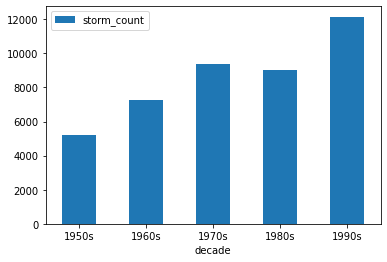

In [ ]:
df_tornadoes = pd.io.gbq.read_gbq('''SELECT
  CONCAT(SUBSTR(_TABLE_SUFFIX,1,3),'0s') as decade, 
  COUNT(event_id) AS storm_count,
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  event_begin_time BETWEEN "1950-01-01" AND "1999-12-31"
  AND (event_type = 'tornado' OR event_type = 'Tornado' or event_type = "tornadoes" or event_type = "Tornadoes")
GROUP BY
  decade
ORDER BY
  decade
''',
  project_id=project_id)
df_tornadoes.plot.bar(rot=0, x='decade')

# **3. File Download**

In [ ]:
polls_url = 'https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv'
df_presidential_polls = pd.read_csv(polls_url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### *Analysis*

**Question 1**

In [ ]:
print("Number of unique presidential candidates:", len(df_presidential_polls.candidate_name.unique()))

Number of unique presidential candidates: 79


**Question 2**

In [ ]:
average_sample_size = df_presidential_polls['sample_size'].mean()
print("The average sample size in the national polls in 2020 is:", average_sample_size)

The average sample size in the national polls in 2020 is: 1594.0069626693803
